In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from sklearn.datasets import load_diabetes

# selection
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import *

# models
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet


# Day 2 - Regression

In [8]:
X, y = load_diabetes(return_X_y=True)

In [9]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=50, shuffle=True,  random_state=42)

In [10]:
X_dev.shape, X_test.shape, y_dev.shape, y_test.shape

((392, 10), (50, 10), (392,), (50,))

## Baseline evaluation

In [11]:
# mean_absolute_error(y_test,  y_test_pred)
# mean_squared_error(y_test,  y_test_pred)

In [12]:
def mean_euclidean_error(y_true, y_pred):
    error = y_true - y_pred
    return np.linalg.norm(error, axis =1).mean()

In [13]:
mean_euclidean_error(np.random.rand(10, 2), np.random.rand(10, 2))

0.562287843946183

## Knn for regression

## Linear Models

### Ridge & Lasso & ElasticNet

## Neural Networks

In [ ]:
nn = MLPRegressor(
    hidden_layer_sizes=(5,)
    ,activation='tanh'
    ,solver='sdg' # adam , sdg
    ,alpha=1e-4
    ,max_iter=50
    ,shuffle=True
    ,learning_rate='adaptive'
    ,learning_rate_init=1e-3
    ,momentum=0.9
    ,nesterovs_momentum=True
    ,verbose=True
)

In [ ]:
nn.fit(X_dev, y_dev)

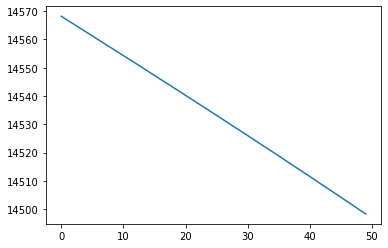

In [ ]:
plt.plot(nn.loss_curve_)

## SVM

In [15]:
svm = SVR(
    C=1.0
    ,epsilon=0.1
    ,kernel='linear'
    ,verbose=True
)

In [16]:
svm.fit(X_dev, y_dev)

[LibSVM]

SVR(kernel='linear', verbose=True)

In [ ]:
svm.n_support_

array([390])

In [ ]:
#Create a svm regressor
clf = SVR(
  kernel='linear'
  #,class_weight='balanced'
  ,verbose=True
)

# Grid Search
param_grid = [{
  'C': [0.01, 0.1, 0.5, 1.0, 10.0]
  ,'kernel': ['linear', 'rbf', 'poly']
  ,'gamma': ['scale', 'auto']  
}]

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=20)
grid_search.fit(X_dev, y_dev)
grid_search.best_estimator_

[LibSVM]

SVR(C=10.0, verbose=True)

In [ ]:

grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SVR(kernel='linear', verbose=True), n_jobs=20,
             param_grid=[{'C': [0.01, 0.1, 0.5, 1.0, 10.0],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly']}])>

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.01157045, 0.01376319, 0.01097274, 0.00977545, 0.01555762,
        0.01974607, 0.03131714, 0.023736  , 0.02752609, 0.02074447,
        0.01436114, 0.01136918, 0.00937409, 0.02752666, 0.03191233,
        0.03949537, 0.03350825, 0.02353706, 0.02533154, 0.03849502,
        0.0099731 , 0.02533135, 0.0291213 , 0.03012009, 0.03251324,
        0.04328384, 0.05245757, 0.02433262, 0.01954942, 0.01635504]),
 'std_fit_time': array([0.00257085, 0.00305171, 0.0012612 , 0.00097768, 0.00970267,
        0.01859864, 0.01875142, 0.01184137, 0.01739574, 0.02058819,
        0.00430601, 0.00272026, 0.00195516, 0.02132101, 0.0279544 ,
        0.03358133, 0.02601032, 0.02814159, 0.03172443, 0.05455632,
        0.00089202, 0.0337134 , 0.02393103, 0.03984512, 0.02917017,
        0.03348816, 0.02860423, 0.02440301, 0.01422462, 0.01041461]),
 'mean_score_time': array([0.01196728, 0.00917578, 0.00259223, 0.0021934 , 0.01595755,
        0.00299153, 0.00339093, 0.00638299, 0.01276598, 0.00

In [28]:
print('MAE: ', mean_absolute_error(y_test, svm.predict(X_test)))
print('MSE: ', mean_squared_error(y_test, svm.predict(X_test)))

MAE:  66.50296286105457
MSE:  6087.891440533779


In [ ]:
#Predict the response for test dataset
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, svm.predict(X_test)))
print('MSE: ', mean_squared_error(y_test, svm.predict(X_test)))
print('R2: ', r2_score(y_test, svm.predict(X_test)))

## TEST

In [32]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
for selection_indices, tets_indices in outer_cv.split(X_dev, y_dev):
    for train_indices, validation_indicesin in inner_cv.split(X[selection_indices], y[selection_indices]):
        # 

IndentationError: expected an indented block (3894535236.py, line 3)

# PyTorch

In [37]:
import torch

In [ ]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [39]:
#torch.tensor({[1, 2], [2.0, 2.1]}).to(torch.device())

In [42]:
X, y = torch.from_numpy(X), torch.from_numpy(y)

In [46]:
X

tensor([[ 0.0381,  0.0507,  0.0617,  ..., -0.0026,  0.0199, -0.0176],
        [-0.0019, -0.0446, -0.0515,  ..., -0.0395, -0.0683, -0.0922],
        [ 0.0853,  0.0507,  0.0445,  ..., -0.0026,  0.0029, -0.0259],
        ...,
        [ 0.0417,  0.0507, -0.0159,  ..., -0.0111, -0.0469,  0.0155],
        [-0.0455, -0.0446,  0.0391,  ...,  0.0266,  0.0445, -0.0259],
        [-0.0455, -0.0446, -0.0730,  ..., -0.0395, -0.0042,  0.0031]],
       dtype=torch.float64)

In [44]:
y.dtype

torch.float64

In [47]:
from torch.utils.data import TensorDataset

In [48]:
dataset = TensorDataset(X, y)

In [52]:
dataset[0:5]

(tensor([[ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026,
           0.0199, -0.0176],
         [-0.0019, -0.0446, -0.0515, -0.0263, -0.0084, -0.0192,  0.0744, -0.0395,
          -0.0683, -0.0922],
         [ 0.0853,  0.0507,  0.0445, -0.0057, -0.0456, -0.0342, -0.0324, -0.0026,
           0.0029, -0.0259],
         [-0.0891, -0.0446, -0.0116, -0.0367,  0.0122,  0.0250, -0.0360,  0.0343,
           0.0227, -0.0094],
         [ 0.0054, -0.0446, -0.0364,  0.0219,  0.0039,  0.0156,  0.0081, -0.0026,
          -0.0320, -0.0466]], dtype=torch.float64),
 tensor([151.,  75., 141., 206., 135.], dtype=torch.float64))

In [55]:
from torch.utils.data import DataLoader

In [56]:
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [61]:
for input, target in loader:
    print(input, target)

tensor([[-0.0527,  0.0507, -0.0407, -0.0676, -0.0318, -0.0370,  0.0376, -0.0395,
         -0.0345,  0.0693],
        [ 0.0090,  0.0507,  0.0304,  0.0425, -0.0029,  0.0369, -0.0655,  0.0712,
         -0.0236,  0.0155],
        [-0.0237, -0.0446,  0.0401, -0.0126, -0.0098, -0.0010, -0.0029, -0.0026,
         -0.0119, -0.0384],
        [ 0.0490,  0.0507,  0.1231,  0.0838, -0.1048, -0.1009, -0.0692, -0.0026,
          0.0366, -0.0301],
        [ 0.0272,  0.0507,  0.0251,  0.0150,  0.0260,  0.0485, -0.0397,  0.0343,
          0.0078,  0.0238],
        [ 0.0199, -0.0446, -0.0342,  0.0552,  0.0672,  0.0742, -0.0066,  0.0328,
          0.0247,  0.0693],
        [-0.0455,  0.0507, -0.0472, -0.0160, -0.0401, -0.0248,  0.0008, -0.0395,
         -0.0629, -0.0384],
        [ 0.0163,  0.0507, -0.0213, -0.0091,  0.0342,  0.0479,  0.0008, -0.0026,
         -0.0129,  0.0238],
        [-0.0818, -0.0446, -0.0817, -0.0401,  0.0026, -0.0185,  0.0707, -0.0395,
         -0.0109, -0.0922],
        [ 0.0344,  

In [62]:
for epoch in range(100):
    for input, target in loader:
        print(input, target)

tensor([[-0.0491, -0.0446, -0.0569, -0.0435, -0.0456, -0.0433,  0.0008, -0.0395,
         -0.0119,  0.0155],
        [-0.0418, -0.0446,  0.1285,  0.0632, -0.0332, -0.0326,  0.0118, -0.0395,
         -0.0160, -0.0508],
        [ 0.0344,  0.0507, -0.0019, -0.0126,  0.0383,  0.0137,  0.0781, -0.0395,
          0.0045, -0.0963],
        [-0.0091, -0.0446, -0.0569, -0.0504,  0.0218,  0.0453, -0.0287,  0.0343,
         -0.0099, -0.0176],
        [-0.1072, -0.0446, -0.0773, -0.0263, -0.0896, -0.0962,  0.0266, -0.0764,
         -0.0426, -0.0052],
        [-0.0709, -0.0446,  0.0391, -0.0332, -0.0126, -0.0345, -0.0250, -0.0026,
          0.0677, -0.0135],
        [ 0.0381,  0.0507, -0.0245,  0.0047, -0.0263, -0.0264,  0.0155, -0.0395,
         -0.0160, -0.0259],
        [ 0.0272, -0.0446,  0.0498, -0.0550, -0.0029,  0.0406, -0.0581,  0.0528,
         -0.0530, -0.0052],
        [ 0.0126, -0.0446,  0.0337,  0.0333,  0.0301,  0.0272, -0.0029,  0.0088,
          0.0312,  0.0279],
        [ 0.0381,  

## Torch NN

In [63]:
from torch.nn import Parameter

In [64]:
w = Parameter(torch.tensor([1.0, 2.0, 3.0]))

In [65]:
w

Parameter containing:
tensor([1., 2., 3.], requires_grad=True)

In [66]:
a = torch.tensor([[1.0, 2.0, 3.0],[1.0, 2.0, 3.0]])

In [67]:
a

tensor([[1., 2., 3.],
        [1., 2., 3.]])

In [69]:
a @ w.t()

tensor([14., 14.], grad_fn=<MvBackward0>)

In [70]:
from torch.nn import Linear

In [71]:
X.shape

torch.Size([442, 10])

In [72]:
f = Linear(30, 1)

In [75]:
list(f.parameters())

[Parameter containing:
 tensor([[-0.0287, -0.0013,  0.0280, -0.1767, -0.1573, -0.1203, -0.1514, -0.1696,
           0.1730,  0.0311, -0.1539,  0.0642,  0.0153,  0.0072,  0.0295,  0.1572,
          -0.1123,  0.0447,  0.0371,  0.0579,  0.0224,  0.1250, -0.0515,  0.1414,
          -0.1007,  0.1479, -0.0808,  0.0392,  0.1095,  0.1579]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1307], requires_grad=True)]

In [ ]:
# BCELOSS function of torch

In [87]:
from torch.nn import BCELoss, ReLU, Sequential

In [77]:
loss = BCELoss()

In [78]:
from torch.optim import SGD 
## for type b we can compare different algorithms from optimizer

In [84]:
optim = SGD(
    f.parameters()
    ,lr=1e-2
    ,weight_decay=1e-3
)

In [85]:
f.weight.dtype

torch.float32

In [83]:
X.dtype

torch.float64

In [ ]:
# Sequential()

In [ ]:
for epoch in range(20):
    for input, target in loader:
        print(input.shape)
        optim.zero_grad()
        pred = f(input)
        L = loss(pred, target)
        L.backward() # compute backward loss
        optim.step()
        print(epoch, L.item())